# Метод конечных элементов (МКЭ)

## Практическое занятие


<a id = "s_sec1"></a>
### 1. Краткие сведения по теории

&nbsp; Рассмотрим стационарную задачу о переносе тепла и в двухмерной пространственной области. Данный процесс описывается параболическим уравнением в частных производных следующего общего вида:

\begin{equation}
-\Delta \left( \kappa T \right) + Q = 0
\label{heat_eq}
\end{equation}

&nbsp; Здесь $T$ - температура в градусах, $\kappa$ - коэффициент теплопроводности (Вт/(м град)), Q - плотность объемных источников тепла (Вт / м$^3$) (Q > 0 - тепло подводится к телу). 

В общем случае граничные условия могут быть трех типов
  * условие постоянного значения температуры на границе (условие Дирихле) $S_1 : T = \hat T(x)$
  * условие заданного потока тепла на границе (условие Неймана) $S_2 : \frac{\partial T}{\partial x}|_{S_2} = q$
  * условие коневективного теплообмена на границе или смешанное условие (условие Робина) $S_3 : \frac{\partial T}{\partial x}|_{S_3} = h(T-T_{\infty})$
  
&nbsp; Мы будем рассматривать первые два условия.

&nbsp; Решение уравнения $\eqref{heat_eq}$ с граничными условиями первого и второго типа эквивалентно задаче о нахождении минимума функционала:

\begin{equation}
F(T) = \int_V (\nabla T)^T \kappa \nabla T  dV + 2 \int_V Q T dV + 2 \int_{S_2} q T dS
\label{heat_functional}
\end{equation}

&nbsp; Разобъем двухмерную область $V$ на конечные элементы $V_e$, $e = 1,...,m$. Решение $T$ будем аппроксимировать конечной суммой 

\begin{equation}T = \sum_{i=1}^{n} N_i T_i\end{equation} 

где $n$ - число узлов, $N_i$ - функции формы или базисные функции. Записывая условие минимума для функционала $\frac{\partial F}{\partial T_i} = 0$, получим СЛАУ относительно узловых значений $T_i$:

\begin{equation} \sum_e k^e  u = \sum_e f^e \end{equation}

или

\begin{equation} Ku = F \end{equation}

\begin{equation} K = \sum_e k^e, F = \sum_e f^e \end{equation}

&nbsp; Элементная матрица системы имеет вид: 

\begin{equation}
k^e = \int_{V^e} (B^e)^T \kappa B^e  dV
\label{elem_mat}
\end{equation}

&nbsp; Элементный вектор правых частей:

\begin{equation}
f^e = -\int_{S_2} q (N^e)^T dS + \int_V Q (N^e)^T dV
\label{elem_rightp}
\end{equation}

где $B^e$ - матрица градиентов $N^e$.

&nbsp; Рассмотрим треугольный элемент с узлами $i,j,k$. Функции формы линейного треугольного элемента $N_s = a_s + b_s x + c_s y$, $s = i,j,k$. Матрица коэффициентов $a_s$, $b_s$ и $c_s$ находятся обращением матрицы $\mathbf{Triang}$ [[1]](#foot1): 

\begin{equation*}
\mathbf{Triang} = 
 \begin{pmatrix}
  1 & x_i & y_i \\
  1 & x_j & y_j \\
  1 & x_k & y_k \\
 \end{pmatrix}
\end{equation*}

&nbsp; Температура на элементе определяется формулой:

\begin{equation*}
T^e = (N_i N_j N_k)
 \begin{pmatrix}
  T_i \\
  T_j \\
  T_k \\
 \end{pmatrix}
\end{equation*}

&nbsp; Матрица градиентов от функций формы:

\begin{equation*}
B^e = \frac{1}{2A}
 \begin{pmatrix}
  b_i & b_j & b_k \\
  c_i & c_j & c_k 
 \end{pmatrix}
\end{equation*}

&nbsp; Рассмотрим элементную матрицу жесткости:
\begin{equation} 
k^e = \frac{1}{4A^2} \int_{V^e}
\begin{pmatrix}
  b_i & c_i \\
  b_j & c_j \\
  b_k & c_k 
\end{pmatrix}
\kappa
 \begin{pmatrix}
  b_i & b_j & b_k \\
  c_i & c_j & c_k 
 \end{pmatrix}
\end{equation}

&nbsp; Подынтегральное выражение постоянно и может быть вынесено за знак интеграла:
\begin{equation}
k^e =  (B^e)^T \kappa B^e \int_{V^e} dV = (B^e)^T \kappa B^e V^e
\end{equation}

&nbsp; Функции формы зависят от координат, поэтому вычисления инегралов в правой части несколько сложнее. Однако интегралы на треугольных элементах принимают особенно простую форму при использовании естественной системы координат [[2]](#foot2):

\begin{equation}
\int_{S} (N_1)^a (N_2)^b dS = \frac{a!b!}{(a+b+1)!}S
\end{equation}

\begin{equation}
\int_{V} (N_1)^a (N_2)^b (N_3)^c dV = \frac{a!b!c!}{(a+b+c+2)!} 2V
\end{equation}

&nbsp; Рассмотрим к примеру первый интеграл в $\eqref{elem_rightp}$ для элемента на грани между узлами $i$ и $j$ которого задано условие на поток тепла:

\begin{equation}
\int_{S_2} q (N^e)^T dS = \int_{S_2} q  
\begin{pmatrix}
  N_i \\
  N_j \\
  N_k
 \end{pmatrix} dS = \frac{q}{2!}l_{ij}
\end{equation}

где $l_{ij}$ - длина грани между узлами $i$ и $j$.

<a id = "foot1"></a> <sub>[1]: Сегерлинд "Применение метода конечных элементов". [Библиотека МГТУ](https://library.bmstu.ru/ECatalog/ViewDescription.aspx?DescriptionId=57173&return=mode%3ds%26src%3dc%26order%3d0%26keywords%3d%25d1%2581%25d0%25b5%25d0%25b3%25d0%25b5%25d1%2580%25d0%25bb%25d0%25b8%25d0%25bd%25d0%25b4%26vmfrom%3d1%26vmto%3d12%26page%3d0).</sub>
 
<a id = "foot2"></a> <sub>[2]: Eisenberg A., Malvern L. // Int. J. Numerical Methods in Engineering 1973, 7 (4). 
[10.1002/nme.1620070421](https://onlinelibrary.wiley.com/doi/abs/10.1002/nme.1620070421.</sub>

<a id = "s_sec2"></a>
### 2. Реализация МКЭ.

&nbsp; Разработаем реализацию метода метода конечных элементов для решения уравнения $\eqref{heat_eq}$. На первом этапе необходимо задать расчетную область и разбить её на треугольные элементы. Вообще говоря, оптимальное построение сеток для МКЭ это отдельная математическая задача, здесь мы не будем углубляться в её детали. Существует большое количество различных программных утилит для построения сеток. Одна из простейших для языка python - [`pydistmesh`](https://github.com/bfroehle/pydistmesh). Для установки `pydistmesh` запустите консоль Anaconda и введите `pip install PyDistMesh`. `pydistmesh` является аналогом MATLAB утилиты [`distmesh`](https://popersson.github.io/distmesh/), по ссылке можно найти сведения об алгоритме, заложенном в `pydistmesh` для построения сеток. Итак, начнем с простейшего варианта перераспределения тепла в круглой области:

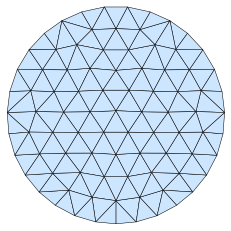

In [1]:
import distmesh as dm     # Загружаем pydistmesh и numpy
import numpy as np
# Используем pydistmesh для генерации треугольной сетки в круглой области с радиусом 1 м.
fd = lambda p: np.sqrt((p**2).sum(1))-1.0
p, t = dm.distmesh2d(fd, dm.huniform, 0.2, (-1,-1,1,1))  # p - массив узлов, t - массив элементов 
                                                         # (индексов узлов для каждого элемента)
    
b=dm.boundedges(p,t)                                     # b - массив граничных элементов
                                                         # (индексов узлов для каждой граничной грани)

&nbsp; На рисунке представлен результат построениия сетки. Далее, на примере этой сетки реализуем решение уравнения $\eqref{heat_eq}$ с однородным распределением плотности объемного источника тепла $Q(x,y) = 4$ и условиями Дирихле на внешней границе $T|_s = 0$:

In [2]:
x = p[:,0]              # координаты узлов по оси x
y = p[:,1]              # координаты узлов по оси y

n = len(x)              # число узлов
m = len(t)              # число элементов

### для решения ДЗ изменить параметры:
T_outer = 0.0   # Температура на внешней границе (град)
q_inner = 0.0   # Тепловой поток на внутренней границе (Вт/м^2) (для задач с внутренней полостью)

### для решения ДЗ задать нужно распределение:
def Q(x,y):
    # Функция определяющая плотность объемного источника тепла (Вт/м^3)
    # в элементе с центром масс (x,y)
    Q = 4.0           
    return(Q)
        
    
    
K = np.zeros((len(x),len(x)))   # глобальная матрица жесткости
F = np.zeros((len(x)))          # глобальный вектор правых частей


for e in range(len(t)):
    
    # расчет локальной матрицы жесткости и вектора правых частей
    
    s = t[e]                      # номера узлов элемента e 
    
    triangle = np.zeros((3,3))    # матрица 3х3 ((1,1,1),(xi,xj,xk),(yi,yj,yk))
    
    C = np.zeros((3,3))           # матрица 3х3 коэффициентов a,b,c ((ai,aj,ak),(bi,bj,bk),(ci,cj,ck))
    grad = np.zeros((2,3))        # матрица 2х3 градиентов ((bi,bj,bk),(ci,cj,ck))
    K1e = np.zeros((3,3))         # локальная матрица жесткости  
    F1e = np.zeros(3)             # локальный вектор правых частей 
     
    for i in range(3):
        triangle[i][0] = 1
        triangle[i][1] = x[s[i]]
        triangle[i][2] = y[s[i]]
   
    A = 0.5*np.linalg.det(triangle)  # площадь элемента

    C = np.linalg.inv(triangle)     

    grad = C[1:3][:]
    
    # Расчет первой составляющей локальной матрицы жесткости
    K1e = A*np.dot(grad.T,grad)
    
    xm = 1/3*(x[s[0]]+x[s[1]]+x[s[2]])
    ym = 1/3*(y[s[0]]+y[s[1]]+y[s[2]])
    # Расчет вектора правых частей     
    for i in range(3):
        F1e[i] = Q(xm,ym)/3.0*A
    
    # Сборка глобальной матрицы жесткости и вектора правых частей 
    for i in range(3):
        for j in range(3):
            K[s[i]][s[j]] = K[s[i]][s[j]] + K1e[i][j]
            
    for i in range(3):
        F[s[i]] = F[s[i]] + F1e[i]

# Граничные условия Неймана        
for e in range(len(b)):  
    s = b[e]
    
    if (np.sqrt(x[s[0]]**2 + y[s[0]]**2) < 0.52 ):  # внутренняя граница
    
        F2e = np.zeros(2)             # локальный вектор правых частей 

        for i in range(2):
            F2e[i] = q_inner * 0.5 * np.sqrt((x[s[0]]-x[s[1]])**2 + (y[s[0]]-y[s[1]])**2)
       
        for i in range(2):
            F[s[i]] = F[s[i]] + F2e[i]    

        
# Граничные условия Дирихле        
for e in range(len(b.ravel())):
    
    s = b.ravel()[e]

    if (np.sqrt(x[s]**2 + y[s]**2) > 0.9):
        bound_val = T_outer  # внешняя граница

        K[s][s] = 1
        F[s] = bound_val

        for i in range(len(x)):
            if(i != s):
                K[s][i] = 0
                F[i] = F[i] - K[i][s] * bound_val
                K[i][s] = 0

                
# Решаем слау KU = F               
T = np.linalg.solve(K, F)

&nbsp; как обычно, нам понадобится процедура для визуализации решения:

In [3]:
def visualize(p,t,T):
    import matplotlib.pyplot as plt
    import matplotlib.tri as mtri
    import matplotlib.cm as cm

    x = p[:,0]
    y = p[:,1]

    triang = mtri.Triangulation(x, y, t)

    fig = plt.figure(figsize=(9, 9))

    ax = plt.axes()
    ax.set_aspect('equal')
    ax.triplot(triang, lw=1.25, color='black',alpha=0.5)

    delta = abs(np.amax(T)-np.amin(T))/100
    levels = np.arange(np.amin(T)-delta, np.amax(T)+delta,delta)
    cntr = ax.tricontourf(triang, T, levels=levels, cmap='jet')

    fig.colorbar(cntr)

    plt.show()

&nbsp; Построим найденное распределение $T(x,y)$ температуры в области:

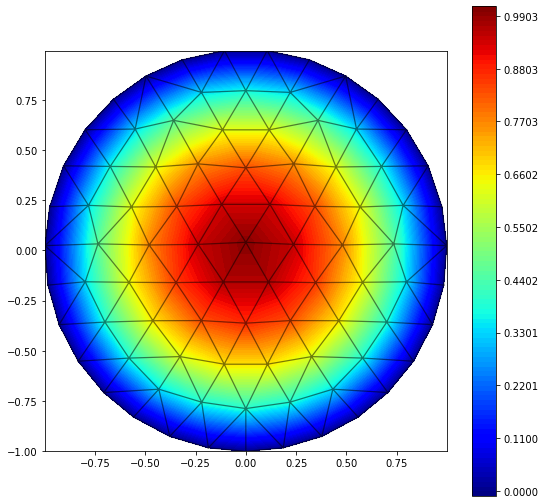

In [4]:
visualize(p,t,T)

Уравнение теплопроводности с однородным распределением объемных источников $Q(x,y) = 4$ и условиями Дирихле на внешней границе $T|_s = 0$ может быть найдено аналитически:

\begin{equation}
T(x,t) = 1 - x^2 - y^2
\end{equation}

&nbsp; Для проверки, сравним наше численное решение с аналитическим:

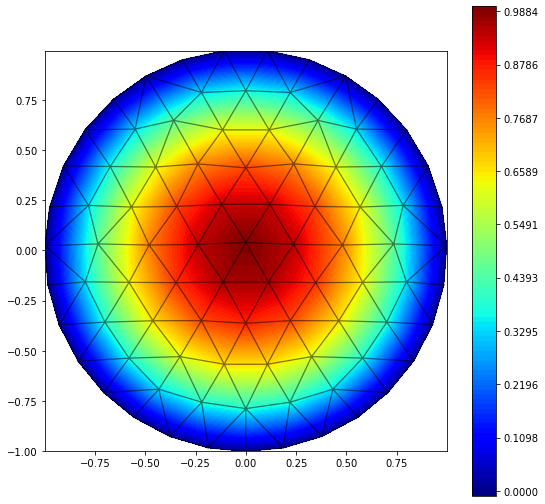

In [5]:
T = 1 - x**2 - y**2 

visualize(p,t,T)

&nbsp; Полученные решения очень близки друг к другу, что докаывает корректность нашей реализации МКЭ для решения задачи теплопроводности.

---

#### Задача 
> Используя метод конечных элементов решить уравнение теплопроводности 
\begin{equation}
-\Delta \left( \kappa T \right) + Q(x,y) = 0
\end{equation}
>
> с условием Неймана на внутренней границе $\frac{\partial T}{\partial x}|_{inner} = q_{inner}$ и условием Дирихле на внешней границе $ T|_{outer} = T|_{outer}$
>
> **Первая цифра варианта:** 
* 1 - геометрия кольцо а) , 
* 2 - геометрия квадрат с отверстием б), 
* 3 - геометрия квадрат с отверстием в)  
>
> **Вторая цифра варианта:** 
* 1 - $Q(x,y) = 25\cdot(x^2 + y)$, 
* 2 - $Q(x,y) = 100\sin(10xy)$, 
* 3 - $Q(x,y) = 25\cdot(x + \sin(y))$ 
>
> **Третья цифра варианта:** 
* 1 - $T_{outer} = 100$ $^o$C, $q_{inner}= 20$ Вт / м$^2$, 
* 2 - $T_{outer} = 50$ $^o$C, $q_{inner}= -5$ Вт / м$^2$, 
* 3 - $T_{outer} = 300$ $^o$C, $q_{inner}= -20$ Вт / м$^2$    
>  
> **Например:** Вариант (1,3,2): геометрия - кольцо а), распределение объемных источников $Q(x,y) = x + y$, гран. условия $T_{outer} = 50$ К, $q_{inner}= -5$ Вт / м$^2$.

#### Внимание! 
В коде выше уже реализованы все гран. условия и работа с любой топологей расчетной области, необходимо лишь правильно задать параметры `T_outer`, `q_inner` и модифицировать функцию `Q(x,y)`. Все варианты сеток построены ниже, вам нужно использовать массивы p,t,b сгенерированные для вашего варианта расчетной области.

#### Замечание
Вообще говоря, при неоднородном распределении плотности объемных источников, для построения правой части необходимо в каждом узле считать интеграл:

\begin{equation}
\int_V Q (N^e)^T dV
\end{equation}

Мы несколько облегчили задачу, посчитав, что в пределах одного элемента объемная плотность источника не меняется, так что $Q$ можно вынести из под знака интегрирования выше и вести расчет точно так же, как если бы $Q$ была константой

---

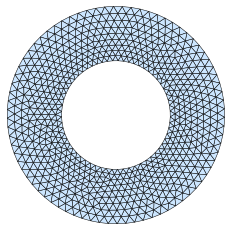

In [10]:
'''
Геометрия расчетной области а)
'''

import distmesh as dm
import numpy as np

fd = lambda p: dm.ddiff(dm.dcircle(p,0,0,1.0),dm.dcircle(p,0,0,0.5))
fh = lambda p: 0.05+0.05*dm.dcircle(p,0,0,0.5)
p, t = dm.distmesh2d(fd, fh, 0.05, (-1,-1,1,1))
b=(dm.boundedges(p,t))

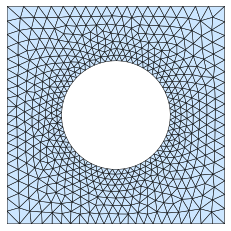

In [11]:
'''
Геометрия расчетной области б)
'''

fd = lambda p: dm.ddiff(dm.drectangle(p,-1,1,-1,1),dm.dcircle(p,0,0,0.5))
fh = lambda p: 0.05+0.1*dm.dcircle(p,0,0,0.5)
p, t = dm.distmesh2d(fd, fh, 0.05, (-1,-1,1,1),[(-1,-1),(-1,1),(1,-1),(1,1)])
b=(dm.boundedges(p,t))

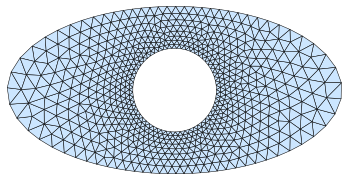

In [12]:
'''
Геометрия расчетной области в)
'''

fd = lambda p: dm.ddiff(p[:,0]**2/2**2 + p[:,1]**2/1**2 - 1,dm.dcircle(p,0,0,0.5))
fh = lambda p: 0.05+0.1*dm.dcircle(p,0,0,0.5)
p, t = dm.distmesh2d(fd, fh, 0.05, (-2,-1, 2,1))
b=(dm.boundedges(p,t))

## Список литературы.

1. "Применение метода конечных элементов" *Л. Сегерлинд* (Пер. с англ. "Applied Finite Element Analysis"). [Библиотека МГТУ](https://library.bmstu.ru/ECatalog/ViewDescription.aspx?DescriptionId=57173&return=mode%3ds%26src%3dc%26order%3d0%26keywords%3d%25d1%2581%25d0%25b5%25d0%25b3%25d0%25b5%25d1%2580%25d0%25bb%25d0%25b8%25d0%25bd%25d0%25b4%26vmfrom%3d1%26vmto%3d12%26page%3d0).
2. "Computational Science and Engineering" *Gilbert Strang*  [amazon.com](https://www.amazon.com/Computational-Science-Engineering-Gilbert-Strang/dp/0961408812)
3. Онлайн курс "Computational Science and Engineering I" *Gilbert Strang* [MIT Open Courseware](https://ocw.mit.edu/courses/mathematics/18-085-computational-science-and-engineering-i-fall-2008/)
4. *J. Alberty, C. Carstensen, S. Funken* "Remarks around 50 lines of Matlab: short finite element implementation" *Numerical Algorithms* 20 (1999) 117-137. [doi:10.1023/A:1019155918070](https://link.springer.com/article/10.1023/A:1019155918070)

---
**Ячейка снизу загружает стилевую конфигурацию блокнота.**

In [9]:
from IPython.core.display import HTML
def css_styling():
    styles = open("./custom.css", "r").read()
    return HTML(styles)
css_styling()